---
layout: default
title: "Overfitting and Regularization"
categories: linearRegression
permalink: /ML8/
order: 8
comments: true
---

In [1]:
%pylab --no-import-all inline
import seaborn as sns
import warnings
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# The problem of overfitting
The problem of overfitting is the main problem in machine learning. All of machine learning revolves around the idea of training a model to fit the data. However, we don't want to just fit the data we have trained the model on, we also want to fit data that the algorithm has never seen before. 

In a sense we could say that we don't want the model to memorize correct results, we instead want it to actually understand the problem.

So, the problem becomes, how do we train a model so that it doesn't just fit the training data (i.e. **overfits**) but instead generalizes to data it has not seen during training?

## Overfitting training data
Let's take some data distributed as in the Figure below

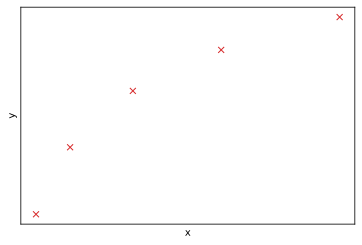

In [2]:
jitter = np.random.rand(5)*0.1
x = np.linspace(0.1, 1, 5)**2+jitter
y = np.log(x)+jitter

fig, ax = plt.subplots()
ax.plot(x, y, marker='x', c='C3', ls='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks([])
ax.set_yticks([]);

Three models are shown in <a href="#fig:biasvariance">the figure Below</a> in panels A, B, C:

* Panel A: We could use linear regression to model this data but this isn't a good model. Looking at the data it seems clear that as $x$ increases, $y$ hits a plateau, while the model implies that $y$ will linearly grow with $x$. We call this problem **underfitting** or we say that the algorithm has **high bias**. It means that the algorithm has a very strong pre-conception (bias) that $y$ are going to behave very linearly.

* Panel B: We could fit a quadratic function and this works pretty well, it seems that the model is "just right".

* Panel C: At the other extreme we fit a 4th order polynomial to the data, and the curve obtained passes exactly through all data points of the training set but it is sort of wiggly and it doesn't seems to be modelling well $y$ behaviour respect $x$. This problem is called **overfitting** or we say that the algorithm has **high variance**. It means that the alogirhtm deosn't generalize well for all possible $x$ values but it seems to cover perfectly only the training set.

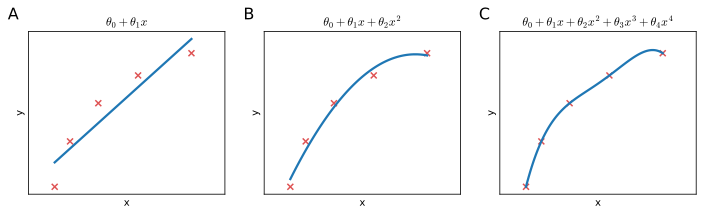

In [7]:
fig, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
ax1, ax2, ax3 = axes
sns.regplot(x=x, y=y, ax=ax1, ci=None, scatter_kws=dict(color='C3'), marker='x')
ax1.set_title('$\\theta_0+\\theta_1x$')
sns.regplot(x=x, y=y, ax=ax2, ci=None, order=2, scatter_kws=dict(color='C3'), marker='x')
ax2.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2$')
sns.regplot(x=x, y=y, ax=ax3, ci=None, order=4, scatter_kws=dict(color='C3'), marker='x')
ax3.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2+\\theta_3x^3+\\theta_4x^4$')

for ax, label in zip(axes, ['A', 'B', 'C']):
    ax.text(-0.05, 1.15, label, transform=ax.transAxes,
      fontsize=16, va='top', ha='right')
    ax.set_xlim(-.1, 1.26)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks([])
    ax.set_yticks([])

<i id="fig:biasvariance">Three examples of models that underfit or have high bias (A), overfit or have high variance (C) and are just right (B)</i>

The problem of overfitting comes when we have too many features and the learned hypothesis may fit the training set very well ($J(\theta)\approx0$), but fail to generalize to new examples.

The example above depicted under and overfitting for linear regression but logistic regression can suffer from the same problems.

Until now, in order to choose the degree of the polynomial of our hypothsis we would look at the plotted data. However this is not always possible because the dataset could be too big (million of rows) or too complex (many columns) to visualize. How do we avoid overfitting in those cases?

* Reduce the number of features (at the cost of loosing potentially important information)
    * manually select which features to keep
    * model selection algorithm
* Regularization: Keep all the features, but reduce the magnitude of parameters $\theta_j$. This method works well when we have many features, each of which contributes to predicting $y$
    

# Regularization  <!--id=reg-->
In the example used above we have seen that a quadratic function would be a good fit for the data, while an higher order polynomial would overfit the data and not generalize well.

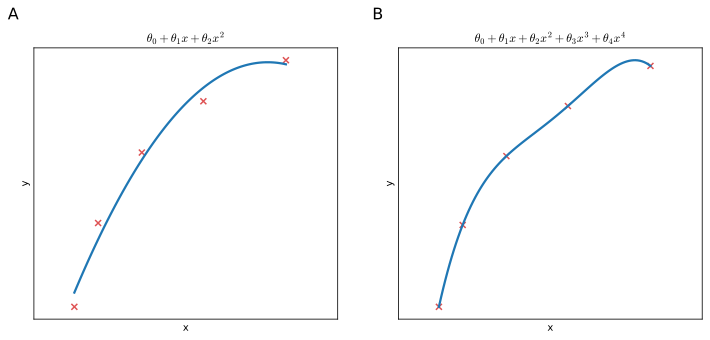

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
[ax1, ax2] = axes
sns.regplot(x=x, y=y, ax=ax1, ci=None, order=2, scatter_kws=dict(color='C3'), marker='x')
ax1.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2$')
sns.regplot(x=x, y=y, ax=ax2, ci=None, order=4, scatter_kws=dict(color='C3'), marker='x')
ax2.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2+\\theta_3x^3+\\theta_4x^4$')

for ax, label in zip(axes, ['A', 'B']):
    ax.text(-0.05, 1.15, label, transform=ax.transAxes,
      fontsize=16, va='top', ha='right')
    ax.set_xlim(-.1, 1.26)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks([])
    ax.set_yticks([])

If we took the 4th order polynomial of panel B and set $\theta_3$ and $\theta_4$ close to 0, the $h_theta(x)$ in panel B will look like a quadratic function.

More in general the idea behind regularization is to set small values for parameters $\theta_j$. This will usually lead to:

* simpler hypotheses
* hypotheses are less prone to overfitting

In order to do that a **regularization term** is added to the cost function. In this case we will add this term to the cost function for linear regression.

$$
J(\theta)=\frac{1}{2m} \text{Cost } + \lambda \sum_{i=1}^n\theta_j^2
$$

$$
J(\theta)=\frac{1}{2m}\left[\sum_{i=1}^m\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2 + \lambda \sum_{i=1}^n\theta_j^2 \right]
$$

Where $\lambda$ is called the **regularization parameter** and controls a tradeoff between two goals:

1. The first goal, represented by $\text{Cost}$ function for a single example, is to fit the training set well
2. The second goal, captured by the regularization term, is to keep the parameters small

In particular if $\lambda$ is set to the right value it will penalize big values of the parameters $\theta$ by increasing the cost associated to a model with those parameters. 

If $\lambda$ is too big it will induce the optimization algorithm (e.g. gradient descent)  to chose a cost function where all parameters are $\approx 0$, resulting in **underfitting** the training set.

By convetion the summation $\sum_{i=1}^n$ starts from $1$, so it is not going to penalize $\theta_0$, however it would make little difference if we were to penalize it too.

## Regularized linear regression
### Regularized gradient descent
Gradient descent for regularized linear regression is the derivative of the regularized cost function for all paramenters of $\theta$ except than $\theta_0$ which is not regularized.

$$
\begin{align}
&\text{Repeat } \{ \\
&\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_0^{(i)} \\
& \theta_j := \theta_j - \alpha \left[\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_j^{(i)} + \frac{\lambda}{m}\theta_j\right] \\
&\}
\end{align}
$$

gradient descent for $\theta_j$ can be written as:

$$
\theta_j := \theta_j\left(1 - \alpha\frac{\lambda}{m}\right) -\alpha\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_j^{(i)}
$$

The term $\left(1 - \alpha\frac{\lambda}{m}\right)$ has very interesting properties. This term is going to be a number that is usually a little smaller than $1$ since $\alpha\frac{\lambda}{m}$ is going to be a positive number and since usually the learning rate $\alpha$ is small and $m$ is large.

So the effect of the term will be to shrink $\theta_j$ by some small factor ($\approx 1$) before the un-regularized part of the gradient descent is applied.

### Regularized normal equation
For the $m,(n+1)$ dimensional matrix of the features $X$ and the $m$ dimensional vector of labels $y$

$$
\begin{split}
X=
\begin{bmatrix}
\left(x^{(1)}\right)^T\\
\vdots\\
\left(x^{(m)}\right)^T
\end{bmatrix}
\end{split}
\quad\quad\quad
\begin{split}
y=
\begin{bmatrix}
y^{(1)}\\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{split}
$$

we minimize $J(\theta)$ by setting $\theta$ with the normal equation

$$
\theta = (X^TX)^{-1}X^Ty
$$

The regularized version of the normal equation is

$$
\theta = \left(X^TX + \lambda M \right)^{-1}X^Ty
$$


Where $M$ is a $(n+1)$ by $(n+1)$ matrix that resembles an identity matrix but where $M^{(1)}_1=0$

$$
\begin{bmatrix}
0 &  &  & \\ 
 & 1 &  & \\ 
 &  & \ddots & \\ 
 &  &  & 1
\end{bmatrix}
$$

### Non invertibility
In a setting where $m\leq n$ than $X^TX$ will be non-invertible (singular). Luckily regularization takes care of that and if $\lambda > 0$, than the term $\left(X^TX + \lambda M \right)$ will be invertible.

## Regularized logistic regression
Logistic regression can suffer from overfitting too. For example we may have an hypothesis with many high order features, or more generally with many features (not necessarily polynomial)

$$
\begin{align}
h_\theta(x)=&g(\theta_0+\theta_1x_1+\theta_2x^2_1 \\
&\theta_3x^2_1x_2+\theta_4x^2_1x^1_2\\
&\theta_5x_1^2x^3_2+\dots)
\end{align}
$$

That would produce a model that tries very hard to correctly classify all examples in teh training set, failing to generalize.

Non regularized logistic regression would have a cost function $j(\theta)$

$$
J(\theta)=\text{Cost}=\frac{1}{m}-\left[\sum^m_{i=1}y^{(i)}\log h_\theta\left(x^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-h_\theta(x^{(1)}\right)\right]
$$

And to regularize it all we need to do is to add the regularization term

$$
J(\theta)=\text{Cost}+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
$$

This has the effect of penalizing the elements of $\theta$ from being too large. So in order to implement gradient descent for regularized logistic regression we will

$$
\begin{align}
&\text{Repeat } \{ \\
&\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_0^{(i)} \\
& \theta_j := \theta_j - \alpha \left[\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_j^{(i)} + \frac{\lambda}{m}\theta_j\right] \\
&\}
\end{align}
$$

where again the update of $\theta_j$ can be written as

$$
\theta_j := \theta_j\left(1 - \alpha\frac{\lambda}{m}\right) -\alpha\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)}-y^{(i)}\right)x_j^{(i)}
$$

This looks cosmetically identical to gradient descent of linear regression but it is of course different because in logistic regression $h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$ whereas for linear regression $h_\theta(x)=\theta^Tx$